# 치타 데이터 분석 

* 분석 결과 요약
    * <span style="color:blue"> 수정 r제곱 :57.9% </span>
    * <span style="color:blue"> 독립변수 :C(gotobed_late)+sleep_score </span>
    * <span style="color:blue"> 해석 : 치타가 오늘 나의 점수를 높게 시작하기 위해서는 잠이 제일 중요하다. 오전 2시 이전(2시 포함X)에 자야하고, 누가 업어가도 모를 정도로 푹 잘 자야한다. 다른 변수는 큰 영향이 없다. </span>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc # 폰트
#한글폰트 적용-----------------------------
from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')
#-----------------------------------------


from datetime import datetime
import time
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
# datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 파일이 있는 경로 지정
path = 'C:\\Users\\USER\\통계\\mini\\'

# 데이터 import

In [3]:
df_all = pd.read_excel(path +"today_score_data.xlsx")

# 치타 데이터만 추출

In [4]:
df = df_all[df_all["name"]=="cheetah"]

# 데이터 확인

In [5]:
df.head()

,cnt,name,today_score,date,dayofweek,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,...,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_range,getup_range,gotobed_late,getup_early
96,97,cheetah,7,2022-09-28,4,0,20.4,16.1,26.1,0.0,...,0,4349,0,0,1,4,01시대,07시대,0,1
97,98,cheetah,5,2022-09-29,5,0,20.4,16.4,26.5,0.0,...,60,3387,0,0,1,2,00시대,06시대,0,1
98,99,cheetah,6,2022-09-30,6,0,20.7,14.8,27.7,0.0,...,0,1636,0,0,0,4,01시대,07시대,0,1
99,100,cheetah,5,2022-10-01,7,1,20.9,14.4,27.6,0.0,...,0,7149,0,0,0,4,00시대,08시대,0,0
100,101,cheetah,7,2022-10-02,1,1,19.4,17.2,21.6,15.8,...,0,4085,0,0,0,2,01시대,09시대,0,0


In [6]:
df.describe()

,cnt,today_score,dayofweek,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,precipitation_check,class_check,...,sleep_score,yesterday_exercise,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_late,getup_early
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,120.50,5.791667,4.020833,0.291667,13.929167,9.595833,19.250000,3.792500,0.208333,0.729167,...,2.812500,0.208333,12.500000,5353.625000,0.208333,0.125000,0.270833,2.979167,0.208333,0.791667
std,14.00,1.821366,2.036785,0.459340,3.762636,3.929591,4.017197,14.023592,0.410414,0.449093,...,1.160635,0.410414,24.624845,3196.325454,0.410414,0.334219,0.449093,0.887012,0.410414,0.410414
min,97.00,2.000000,1.000000,0.000000,4.900000,0.800000,9.800000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,273.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,108.75,4.750000,2.000000,0.000000,11.175000,6.650000,16.550000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,3062.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
50%,120.50,6.000000,4.000000,0.000000,13.550000,9.550000,19.100000,0.000000,0.000000,1.000000,...,3.000000,0.000000,0.000000,4900.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
75%,132.25,7.000000,6.000000,1.000000,16.300000,11.800000,21.600000,0.000000,0.000000,1.000000,...,4.000000,0.000000,0.000000,6993.000000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000
max,144.00,9.000000,7.000000,1.000000,21.400000,17.500000,27.700000,76.000000,1.000000,1.000000,...,5.000000,1.000000,60.000000,15030.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


In [7]:
# null 값 확인
df.isnull().sum()

cnt                        0
name                       0
today_score                0
date                       0
dayofweek                  0
dayofweek_check            0
avg_temp                   0
low_temp                   0
high_temp                  0
precipitation              0
precipitation_check        0
class_check                0
gotobed_time               0
getup_time                 0
sleep_time                 0
morning_routine            0
weather_prefer             0
sleep_score                0
yesterday_exercise         0
yesterday_exercise_time    0
yesterday_step_cnt         0
yesterday_drinking         0
period                     0
caffeine                   0
yesterday_satisfaction     0
gotobed_range              0
getup_range                0
gotobed_late               0
getup_early                0
dtype: int64

# 컬럼 정보

## 종속변수

* today_score : 오늘 나의 점수 (10점 만점)

## 독립변수
*  색깔 의미 
    * 범주형 변수 : <span style="color:red"> 빨간색</span>
    *  수치형 변수 : 검정색

* date                       : 날짜 (2022-09-28 ~ 2022-11-14)
*  <span style="color:red"> dayofweek                  : 요일 (일요일 = 1 ~ 토요일 = 7) </span>
* <span style="color:red"> dayofweek_check : 주말 여부 (주말 = 1, 주말 x = 0)</span>

* <span style="color:red"> class_check                      : 수업 여부 (수업 안 하는 날 = 0, 수업 하는 날 = 1) </span>
* gotobed_time               : 취침 시간 
* <span style="color:red"> gotobed_range              : 취침 시간대  </span>
* <span style="color:red"> gotobed_late              : 늦게 취침했는지 여부 (오전 2시 이전에 취침한 경우(2시 포함X)=0, 오전 2시 이후에 취침한 경우(2시 포함o)=1)  </span>
* getup_time                 : 기상 시간 
* <span style="color:red"> getup_range              : 기상 시간대  </span>
* <span style="color:red"> getup_early              : 일찍 기상 했는지 여부 (오전 8시 이후에 기상한 경우(8시 포함O)=0, 오전 8시 이전에 기상한 경우(8시 포함X)=1  </span>
* sleep_time                 : 수면 시간 (기상시간 - 취침 시간)
* <span style="color:red"> morning_routine            : 모닝루틴 실행 여부 (모닝루틴 x = 0, 모닝루틴 o = 1) </span>
* <span style="color:red"> weather_prefer             : 날씨 선호 여부 (날씨 선호 x = 0, 날씨 선호 o = 1) </span>
* sleep_score                : 수면 점수 (5점 만점)
* <span style="color:red"> yesterday_exercise         : 전일 운동 여부 (전일 운동 x = 0, 전일 운동 o = 1) </span>
* yesterday_exercise_time    : 전일 운동 시간 (분)
* yesterday_step_cnt         : 전날 걸음 수 
* <span style="color:red"> yesterday_drinking         : 전날 음주 여부 (전날 음주 x = 0, 전일 운주 o = 1) </span>
* <span style="color:red"> period                     : 생리 여부 (생리 x = 0, 생리 o = 1) </span>
* <span style="color:red"> caffeine                   : 카페인 섭취 여부 (카페인 x = 0, 카페인 o = 1) </span>
* yesterday_satisfaction     : 전날 만족도 (5점 만점)

* avg_temp                   : 평균 기온 (℃)
* low_temp                   : 최저 기온 (℃)
* high_temp                  : 최고 기온 (℃)
* precipitation              : 강수량 (mm)
* <span style="color:red">  precipitation_check : 강수 여부 (강수 = 1, 강수 x = 0)</span>

# 데이터 타입 변경 
* 수치형 변수 -> int or float
* 범주형 변수 -> object

In [8]:
#데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 96 to 143
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      48 non-null     int64         
 1   name                     48 non-null     object        
 2   today_score              48 non-null     int64         
 3   date                     48 non-null     datetime64[ns]
 4   dayofweek                48 non-null     int64         
 5   dayofweek_check          48 non-null     int64         
 6   avg_temp                 48 non-null     float64       
 7   low_temp                 48 non-null     float64       
 8   high_temp                48 non-null     float64       
 9   precipitation            48 non-null     float64       
 10  precipitation_check      48 non-null     int64         
 11  class_check              48 non-null     int64         
 12  gotobed_time             48 non-null

In [9]:
#범주형 변수를 object 타입으로 변경
df['dayofweek'] = df['dayofweek'].astype(object)
df['dayofweek_check'] = df['dayofweek_check'].astype(object)
df['class_check'] = df['class_check'].astype(object)
df['morning_routine'] = df['morning_routine'].astype(object)
df['weather_prefer'] = df['weather_prefer'].astype(object)
df['yesterday_exercise'] = df['yesterday_exercise'].astype(object)
df['yesterday_drinking'] = df['yesterday_drinking'].astype(object)
df['period'] = df['period'].astype(object)
df['caffeine'] = df['caffeine'].astype(object)
df['precipitation_check'] = df['precipitation_check'].astype(object)
df['gotobed_late'] = df['gotobed_late'].astype(object)
df['getup_early'] = df['getup_early'].astype(object)

In [10]:
#데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 96 to 143
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      48 non-null     int64         
 1   name                     48 non-null     object        
 2   today_score              48 non-null     int64         
 3   date                     48 non-null     datetime64[ns]
 4   dayofweek                48 non-null     object        
 5   dayofweek_check          48 non-null     object        
 6   avg_temp                 48 non-null     float64       
 7   low_temp                 48 non-null     float64       
 8   high_temp                48 non-null     float64       
 9   precipitation            48 non-null     float64       
 10  precipitation_check      48 non-null     object        
 11  class_check              48 non-null     object        
 12  gotobed_time             48 non-null

# 데이터 분포 확인

## 종속변수 today_score 

<AxesSubplot:xlabel='today_score', ylabel='Density'>

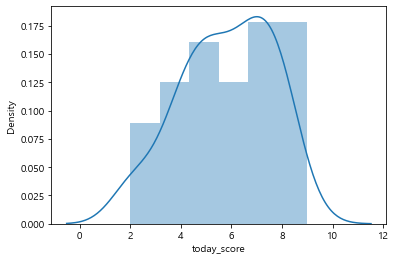

In [11]:
sns.distplot(df['today_score'])

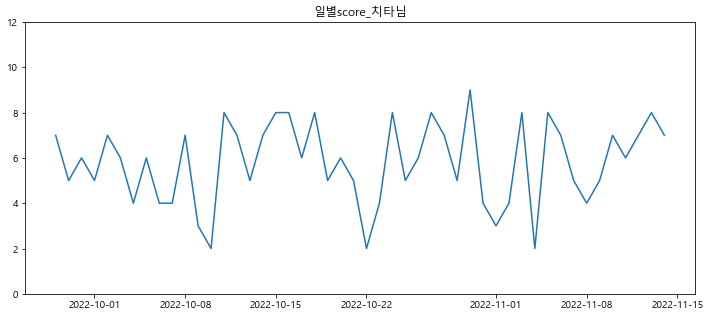

In [12]:
plt.figure(figsize=(12,5))
plt.title('일별score_치타님')
plt.ylim([0, 12])
plt.plot(df['date'],df['today_score'])

### 독립 변수_범주형 변수

In [13]:
# 변수 형이 obhect인 컬럼 추출
object_feature = [ col for col in df.columns if df[col].dtypes == "object"]
object_feature

['name',
 'dayofweek',
 'dayofweek_check',
 'precipitation_check',
 'class_check',
 'gotobed_time',
 'getup_time',
 'morning_routine',
 'weather_prefer',
 'yesterday_exercise',
 'yesterday_drinking',
 'period',
 'caffeine',
 'gotobed_range',
 'getup_range',
 'gotobed_late',
 'getup_early']

In [14]:
# name, gotbed_time, getup_time 컬럼 제외하고 리스트 생성
category_feature = list(set(object_feature) - set(['name','gotobed_time','getup_time']))
category_feature

['getup_range',
 'dayofweek',
 'morning_routine',
 'getup_early',
 'yesterday_exercise',
 'precipitation_check',
 'class_check',
 'period',
 'dayofweek_check',
 'gotobed_range',
 'yesterday_drinking',
 'gotobed_late',
 'caffeine',
 'weather_prefer']

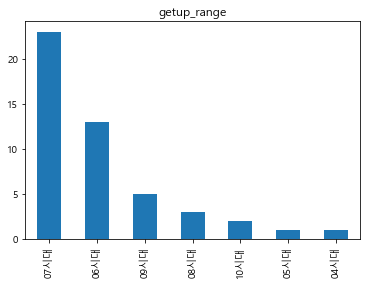

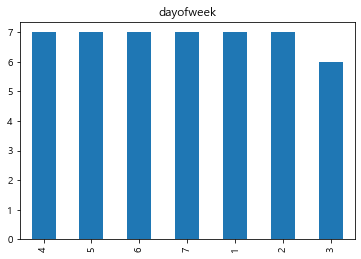

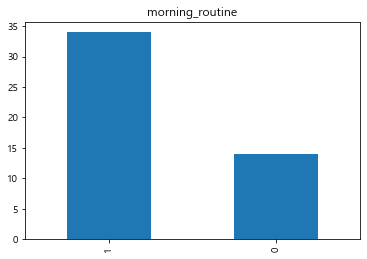

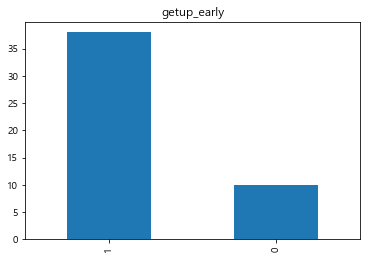

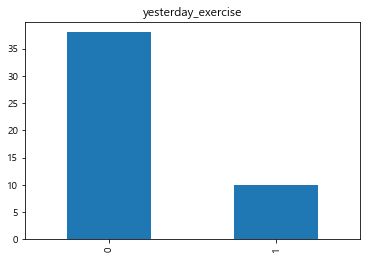

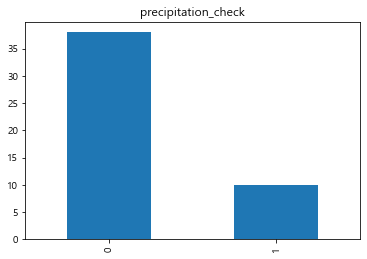

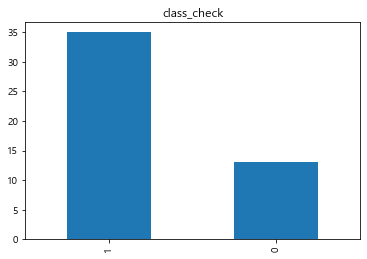

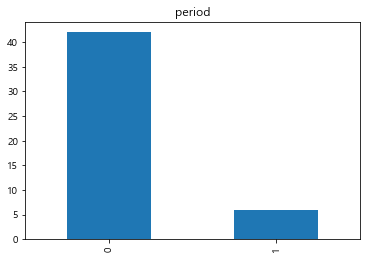

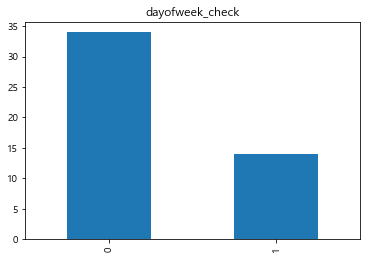

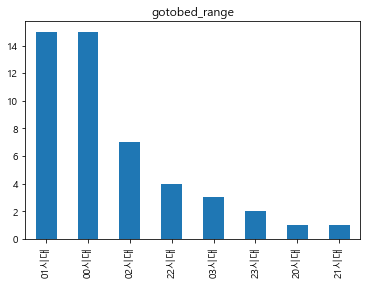

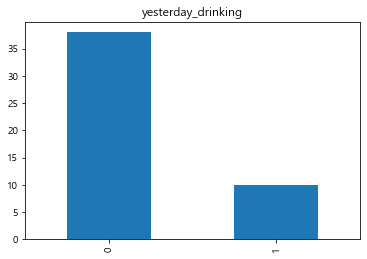

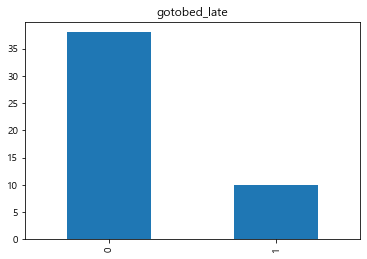

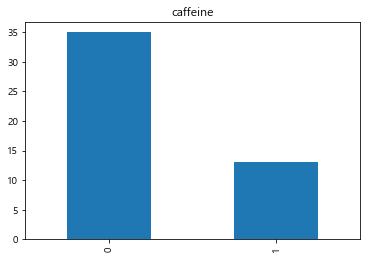

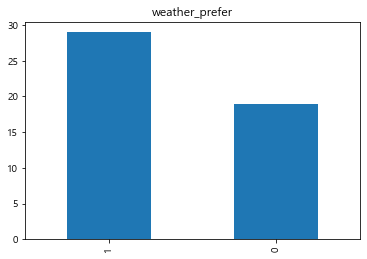

In [15]:
# 범주형 변수 분포 확인
for col in category_feature:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

* 범주형 변수 분포 해석 
: <span style="color:blue">파란색</span> 글씨는 5명 전체 분포와 다른 결과 
    * weather_prefer : 오늘 날씨가 맘에 든 날이 맘에 들지 않은 날 보다 많다. 
    * <span style="color:blue"> morning_routine : 모닝루틴을 한 날이 안 한 날 보다 많다.</span>
    * yesterday_drinking : 어제 술을 안 마신 날이 마신 날보다 많다.
    * period
    * gotobed_range : 취침시간은 01시 -> 00시 -> 02시 순으로 많다.
    * class_check : 수업을 한 날이 안 한 날보다 많다. 
    * caffeine : 카페인을 섭취하지 않은 날이 섭취한 날 보다 많다. 
    * dayofweek_check 
    * <span style="color:blue"> getup_early : 오전 8시 이전(8시 포함x)에 기상한 경우가 더 많다. </span>
    * gotobed_late : 오전 2시 이전(2시 포함x)에 취침한 경우가 더 많다.     
    * yesterday_exercise : 어제 운동을 안 한 날이 한 날 보다 많다. 
    * precipitation_check : 비가 안 온 날이 비 온 날 보다 많다.    
    * dayofweek 
    * <span style="color:blue"> getup_range : 기상 시간은 07시 -> 06시 -> 09시 순으로 많다. </span>

### 독립 변수_수치형 변수 

In [16]:
# 전체 변수중 object변수 제외, today_score,cnt, date도 제외
numerical_feature = list(set(df.columns) - set(object_feature) - set(['cnt','date','today_score']))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['avg_temp', 'high_temp', 'low_temp', 'precipitation',
       'sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt'], dtype='<U23')

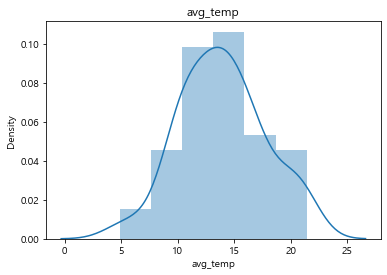

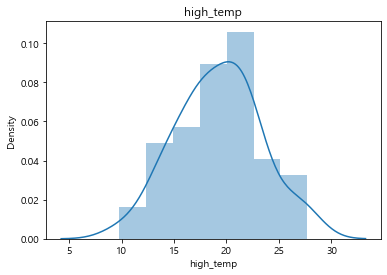

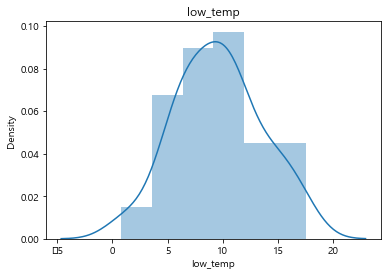

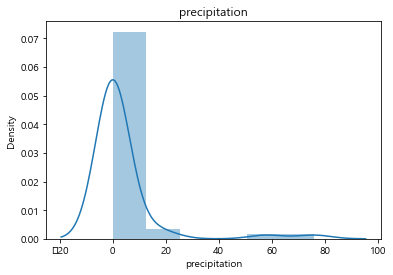

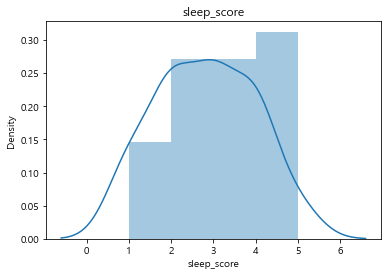

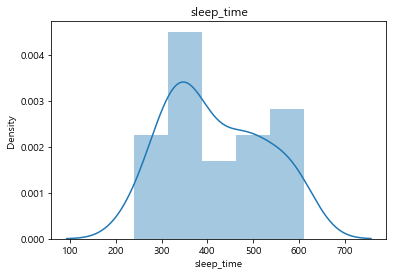

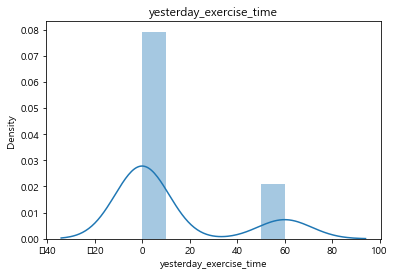

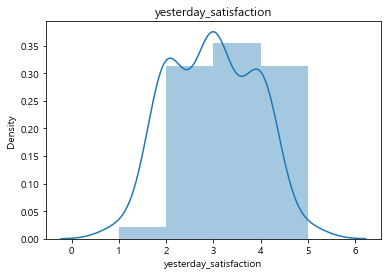

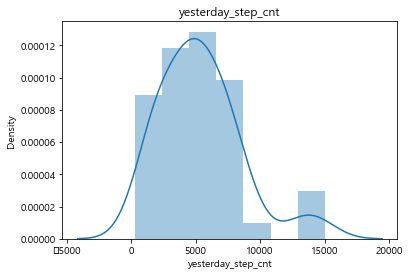

In [17]:
# 수치형 변수 분포 확인
for col in numerical_feature:
    sns.distplot(df.loc[df[col].notnull(), col])
    plt.title(col)
    plt.show()

# 상관분석 

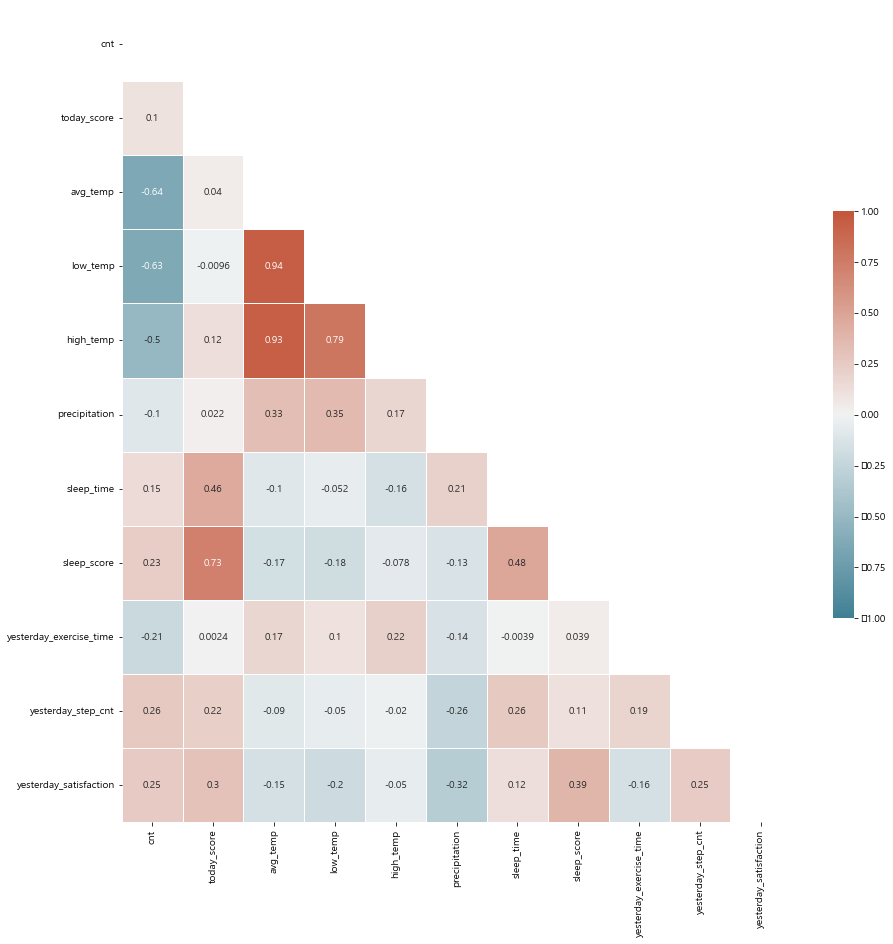

In [18]:
tmp = df.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,15) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(tmp, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# 히트맵 팔레트 색상 불러오기
cmap = sns.diverging_palette(220, 20, as_cmap=True)


# 히트맵을 그린다
sns.heatmap(tmp , 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            cmap = cmap,
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()


* 상관 분석 해석 
: <span style="color:blue">파란색</span> 글씨는 5명 전체 분포와 다른 결과 
    * 오늘 나의 점수(today_score)와는 sleep_time(수면시간), sleep_score(수면 점수), yesterday_satisfaction(전날 만족도)가 상관관계가 있다. 
    * 평균기온(avg_temp)과 최고기온(high_temp), 최저기온(low_temp)은 강한 상관관계가 있다. 다중공선성도 높게 나올 것 같아서, 다중회귀에 넣을 때 체크해봐야겠다.
    * sleep_score(수면 점수)와 yesterday_satisfaction(전날 만족도)가 상관관계가 있다. 
    * sleep_score(수면 점수)와 sleep_time(수면시간)이 상관관계가 있다. 
    * <span style="color:blue"> yesterday_step_cnt(전날 걸음수)와 yesterday_exercise_time(전날 운동시간)이 상관관계가 거의 없다.</span>

# 왜도 확인
- 왜도가 -2~2사이에 있으면 정규분포를 만족한다고 본다. 
- 정규분포를 만족하지 않는 값은 log를 씌우는 것을 고려해보자.

In [19]:
df.skew()

cnt                        0.000000
today_score               -0.382578
dayofweek                 -0.029393
dayofweek_check            0.946538
avg_temp                   0.096425
low_temp                   0.066712
high_temp                  0.016375
precipitation              4.342097
precipitation_check        1.483126
class_check               -1.064949
sleep_time                 0.284590
morning_routine           -0.946538
weather_prefer            -0.439882
sleep_score                0.041603
yesterday_exercise         1.483126
yesterday_exercise_time    1.483126
yesterday_step_cnt         1.042527
yesterday_drinking         1.483126
period                     2.341607
caffeine                   1.064949
yesterday_satisfaction     0.041726
gotobed_late               1.483126
getup_early               -1.483126
dtype: float64

* 결과 : 범주형 변수를 제외하고 precipitation

# 단일 선형 회귀

## 범주형 변수

In [20]:
#범주형 변수 출력
category_feature

['getup_range',
 'dayofweek',
 'morning_routine',
 'getup_early',
 'yesterday_exercise',
 'precipitation_check',
 'class_check',
 'period',
 'dayofweek_check',
 'gotobed_range',
 'yesterday_drinking',
 'gotobed_late',
 'caffeine',
 'weather_prefer']

* 🎉의미 : p-value가 0.05미만으로 유의미함, 귀무가설 기각
* <span style="color:blue">파란색</span> 글씨 의미 :  5명 전체 분포와 다른 결과

###  dayofweek : 요일 (일요일 = 1 ~ 토요일 = 7)
* <span style="color:blue"> 해석 : 요일별로 오늘 나의 점수 차이가 없다는 귀무가설 채택 </span>
* 분석가 의견 : 데모데이 프로젝트 기간에는 요일에 상관없이 프로젝트를 진행했기에 요일별로 큰 차이가 없는 결과가 도출된 것 같다.

In [21]:
test = ols('today_score ~ C(dayofweek)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                 -0.077
Method:                 Least Squares   F-statistic:                    0.4404
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.847
Time:                        23:42:10   Log-Likelihood:                -94.885
No. Observations:                  48   AIC:                             203.8
Df Residuals:                      41   BIC:                             216.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.5714      0.71

### dayofweek_check : 주말 여부 (주말 = 1 , 주말 x = 0)
* <span style="color:blue"> 해석 : 주말과 평일의 오늘 나의 점수 차이가 없다는 귀무가설 채택 </span>
* 분석가 의견 : 데모데이 프로젝트 기간에는 요일에 상관없이 프로젝트를 진행했기에 요일별로 큰 차이가 없는 결과가 도출된 것 같다.

In [22]:
test = ols('today_score ~ C(dayofweek_check)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.469
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.232
Time:                        23:44:17   Log-Likelihood:                -95.630
No. Observations:                  48   AIC:                             195.3
Df Residuals:                      46   BIC:                             199.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

###  precipitation_check : 강수 여부 (강수 = 1 , 강수 x = 0)
* 가설 : 비 안 오는 날이 비오는 날보다 오늘의 점수가 높을 것이다.
<br> <br/>
* 해석 : 비오는 날과 비 안오는 날이 차이가 없다는 귀무가설 채택
* 분석가 의견 : 비 오는 날이 몇일 없었고, 온 날 도 오늘 나의 점수를 매기는 아침에 왔는지 알 수 없기 때문에 차이가 없는 결과가 도출된 것 같다. 

In [23]:
test = ols('today_score ~ C(precipitation_check)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.343
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.253
Time:                        23:45:07   Log-Likelihood:                -95.693
No. Observations:                  48   AIC:                             195.4
Df Residuals:                      46   BIC:                             199.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

###  class : 수업 여부 (수업 안 하는 날 = 0, 수업 하는 날 = 1)
* 가설 : 수업을 안 하는 날이 하는 날 보다 오늘의 점수가 높을 것이다
<br><br/>
* <span style="color:blue"> 해석 : 수업 여부에 따라 오늘 나의 점수 차이가 없다는 귀무가설 채택 </span>
* 분석가 의견 : 데모데이 프로젝트 기간에는 수업 여부에 상관없이 프로젝트를 진행했기에 수업 여부에 따라 큰 차이가 없는 결과가 도출된 것 같다.

In [24]:
test = ols('today_score ~ C(class_check)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4320
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.514
Time:                        23:45:30   Log-Likelihood:                -96.160
No. Observations:                  48   AIC:                             196.3
Df Residuals:                      46   BIC:                             200.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.0769    

### morning_routine : 모닝루틴 실행 여부 (모닝루틴 x = 0, 모닝루틴 o = 1)
* 가설 : 모닝루틴을 한 날이 안 하는 날 보다 오늘의 점수가 높을 것이다
<br><br/>
* 해석: 모닝루틴을 한 날과 안하는 날의 오늘 나의 점수 차이가 없다는 귀무가설을 채택
* 분석가 의견 : 모닝루틴을 안 한 날이 더 많았기 때문에, 안 한 날이 계속 이어지게 되면서 하든 안하든 무뎌졌기 때문에 이런 결과가 나온 것 같다. 

In [25]:
test = ols('today_score ~ C(morning_routine)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.128
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.294
Time:                        23:46:18   Log-Likelihood:                -95.803
No. Observations:                  48   AIC:                             195.6
Df Residuals:                      46   BIC:                             199.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### yesterday_exercise : 전일 운동 여부 (전일 운동 x = 0, 전일 운동 o = 1)
* 가설 : 전일 운동을 안 한 날이 한 날 보다 오늘의 점수가 높을 것이다
<br><br/>
* 해석: 전일 운동을 한 날과 안한 날의 오늘 나의 점수 차이가 없다는 귀무가설을 채택
* 분석가 의견 : 전일 운동을 안 한 날이 더 많았기 때문에, 안 한 날이 계속 이어지게 되면서 하든 안하든 무뎌졌기 때문에 이런 결과가 나온 것 같다.

In [26]:
test = ols('today_score ~ C(yesterday_exercise)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                 0.0002588
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.987
Time:                        23:46:59   Log-Likelihood:                -96.384
No. Observations:                  48   AIC:                             196.8
Df Residuals:                      46   BIC:                             200.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

###  yesterday_drinking : 전날 음주 여부 (전날 음주 x = 0, 전날 음주 o = 1)
* 가설 : 전날 음주를 안 한 날이 한 날 보다 오늘의 점수가 높을 것이다
<br><br/>
* <span style="color:blue"> 해석 : 음주 여부에 따라 오늘 나의 점수 차이가 없다는 귀무가설 채택 </span>
* 분석가 의견 : 음주를 할 때 가볍게 맥주 한 잔 정도 했기에 음주 여부는 점수에 큰 영향을 미치지 않았다. 

In [27]:
test = ols('today_score ~ C(yesterday_drinking)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9836
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.327
Time:                        23:49:08   Log-Likelihood:                -95.876
No. Observations:                  48   AIC:                             195.8
Df Residuals:                      46   BIC:                             199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### 🎉 period : 생리 여부 (생리 x = 0, 생리 o = 1)
* 가설 : 생리를 안하는 날이 하는 날 보다 오늘의 점수가 높을 것이다
<br><br/>
* 수정r제곱 기준 설명력 : 0.06(6%)
* <span style="color:blue"> 해석 : 생리 여부에 따라 오늘 나의 점수 차이가 없다는 귀무가설 기각, 생리를 하는 날이 생리를 하지 않은 날 보다 1.0490점 높음 </span>
* 분석가 의견 : 생리를 한 날 보다 생리를 안 한 날이 훨씬 더 많았기 때문에, 편향으로 발생한 결과 일 수 있다.

In [28]:
test = ols('today_score ~ C(weather_prefer)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     4.055
Date:                Wed, 23 Nov 2022   Prob (F-statistic):             0.0499
Time:                        23:50:56   Log-Likelihood:                -94.356
No. Observations:                  48   AIC:                             192.7
Df Residuals:                      46   BIC:                             196.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

### caffeine : 카페인 섭취 여부 (카페인 x = 0, 카페인 o = 1)
* 가설 : 카페인을 섭취 한 날이 안 한 날 보다 오늘의 점수가 높을 것이다
<br><br/>
* 해석: 카페인을 섭취 한 날과 안 한 날이 오늘 나의 점수 차이가 없다는 귀무가설을 채택

In [29]:
test = ols('today_score ~ C(caffeine)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.037
Date:                Wed, 23 Nov 2022   Prob (F-statistic):              0.314
Time:                        23:56:12   Log-Likelihood:                -95.849
No. Observations:                  48   AIC:                             195.7
Df Residuals:                      46   BIC:                             199.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.6286      0.308  

### 🎉🎉gotobed_range : 취침 시간대
* <span style="color:blue"> 수정r제곱 기준 설명력 : 0.26(26%)</span>
<br><br/>
* <span style="color:blue"> 해석 1 : 00시에 취침할 때와 03시에 취침할 때의 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 03시에 취침할 때가 00시에 취침할 때 보다 3.7점 낮음 </span>
* <span style="color:blue"> 해석 2 : 00시에 취침할 때와 02시에 취침할 때의 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 02시에 취침할 때가 00시에 취침할 때 보다 1.5점 낮음 </span> 

In [30]:
test = ols('today_score ~ C(gotobed_range)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     3.451
Date:                Wed, 23 Nov 2022   Prob (F-statistic):            0.00554
Time:                        23:56:54   Log-Likelihood:                -85.044
No. Observations:                  48   AIC:                             186.1
Df Residuals:                      40   BIC:                             201.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

###  🎉gotobed_late: 늦게 취침했는지 여부 
(오전 2시 이전에 취침한 경우(2시 포함X)=0, 오전 2시 이후에 취침한 경우(2시 포함o)=1)
<br><br/>
* 가설 : 늦게 취침할 수록 오늘 나의 점수가 낮을 것이다.
* <span style="color:blue"> 수정r제곱 기준 설명력 : 0.18(18%)</span>
* <span style="color:blue"> 해석 : 늦게 취침 한 날과 늦게 취침하지 않은 날의 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 2시 이후에 취침한 경우 오늘 나의 점수가 2점 낮음 </span>

In [31]:
test = ols('today_score ~ C(gotobed_late)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     11.88
Date:                Thu, 24 Nov 2022   Prob (F-statistic):            0.00122
Time:                        00:33:29   Log-Likelihood:                -90.871
No. Observations:                  48   AIC:                             185.7
Df Residuals:                      46   BIC:                             189.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.2105 

### 🎉getup_range              : 기상 시간대
* <span style="color:blue"> 수정r제곱 기준 설명력 : 0.08(8%)</span>
<br><br/>
* <span style="color:blue"> 해석1 : 04시에 기상할 때와 05시에 기상할 때의 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 05시에 기상할 때가 04시에 기상할 때 보다 7점 낮음  </span>
* <span style="color:blue"> 해석2 : 04시에 기상할 때와 10시에 기상할 때의 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 10시에 기상할 때가 04시에 기상할 때 보다 4.5점 낮음  </span>
* <span style="color:blue"> 분석가 의견 : 04시에 기상 했을 때가 1번 있었는데,  이 때 20시에 취침해서 04시에 기상했기 때문에 오늘 나의 점수가 매우 높게 나왔었다. 그렇기에 이런 해석이 나왔다. 기상 시간대는 취침시간대를 함께 봐야할 것 같다. </span>

In [32]:
test = ols('today_score ~ C(getup_range)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     1.732
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.138
Time:                        00:35:21   Log-Likelihood:                -90.961
No. Observations:                  48   AIC:                             195.9
Df Residuals:                      41   BIC:                             209.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9

### getup_early              : 일찍 기상 했는지 여부 
(오전 8시 이후에 기상한 경우(8시 포함O)=0, 오전 8시 이전에 기상한 경우(8시 포함X)=1 
<br><br/>
* 가설 : 일찍 기상할 수록 오늘 나의 점수가 낮을 것이다.
* 해석 : 일찍 기상 한 날과 일찍 기상하지 않은 날의 오늘 나의 점수 차이가 없다는 귀무가설을 채택

In [33]:
test = ols('today_score ~ C(getup_early)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                   0.04378
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.835
Time:                        00:42:14   Log-Likelihood:                -96.361
No. Observations:                  48   AIC:                             196.7
Df Residuals:                      46   BIC:                             200.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.9000    

#### cheetah_getup_early              : 치타기준 일찍 기상 했는지 여부 
(오전 7시 이후에 기상한 경우(7시 포함x)=0, 오전 7시 이전에 기상한 경우(7시 포함X)=1
치타는 일찍 일어나는 편이어서 따로 기준을 설정해줬다.
<br><br/>
* 가설 : 일찍 기상할 수록 오늘 나의 점수가 낮을 것이다.
* 해석 : 일찍 기상 한 날과 일찍 기상하지 않은 날의 오늘 나의 점수 차이가 없다는 귀무가설을 채택

##### (1) 변수 생성

In [83]:
cheetah_getup_early = []

for row in df['getup_range']:
    if row == '06시대' or row == '05시대' or row == '04시대':
        cheetah_getup_early.append('1')
    else:
        cheetah_getup_early.append('0')

In [84]:
df['cheetah_getup_early'] = cheetah_getup_early

##### (2) 단일선형회귀 

In [86]:
test = ols('today_score ~ C(cheetah_getup_early)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.1296
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.721
Time:                        01:24:55   Log-Likelihood:                -96.316
No. Observations:                  48   AIC:                             196.6
Df Residuals:                      46   BIC:                             200.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## 수치형 변수

In [34]:
numerical_feature

array(['avg_temp', 'high_temp', 'low_temp', 'precipitation',
       'sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt'], dtype='<U23')

* 🎉의미 : p-value가 0.05미만으로 유의미함, 귀무가설 기각
* <span style="color:blue">파란색</span> 글씨 의미 :  5명 전체 분포와 다른 결과

### avg_temp : 평균 기온 (℃)
* 해석 : 평균 기온에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 채택

In [35]:
test = ols('today_score ~ avg_temp', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.07381
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.787
Time:                        00:43:02   Log-Likelihood:                -96.345
No. Observations:                  48   AIC:                             196.7
Df Residuals:                      46   BIC:                             200.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5218      1.028      5.370      0.0

### low_temp : 최저 기온 (℃)
* 해석 : 최저 기온에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 채택

In [36]:
test = ols('today_score ~ low_temp', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                  0.004272
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.948
Time:                        00:43:12   Log-Likelihood:                -96.382
No. Observations:                  48   AIC:                             196.8
Df Residuals:                      46   BIC:                             200.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8345      0.708      8.246      0.0

### high_temp : 최고 기온 (℃)
* 해석 : 최고 기온에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 채택

In [37]:
test = ols('today_score ~ high_temp', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7272
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.398
Time:                        00:43:24   Log-Likelihood:                -96.008
No. Observations:                  48   AIC:                             196.0
Df Residuals:                      46   BIC:                             199.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7029      1.304      3.607      0.0

### precipitation : 강수량 (mm)
* 가설 : 비가 많이 올 수록 오늘의 점수가 낮을 것이다.
<br><br/>
* <span style="color:blue"> 해석 : 강수량에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 채택 </span>

In [38]:
#8 왜도 확인 결과 -2~2 범위에 벗어나서 log를 씌움
test = ols('today_score ~  np.log1p(precipitation)', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.08441
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.773
Time:                        00:43:36   Log-Likelihood:                -96.340
No. Observations:                  48   AIC:                             196.7
Df Residuals:                      46   BIC:                             200.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### 🎉sleep_time : 수면 시간 (기상시간 - 취침 시간)
* 가설 : 수면 시간이 많을 수록 오늘 나의 점수가 높다. 
<br><br/>
* <span style="color:blue"> 수정r제곱 기준 설명력 : 0.19(11%) </span>
* <span style="color:blue"> 해석 : 수면 시간에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 1분 더 잘 수록 0.0078점 증가 </span>
* <span style="color:blue"> 분석가 의견 : 전체 데이터(0.11) 보다 수면 시간 설명력이 조금 더 높다. </span>


In [39]:
test = ols('today_score ~ sleep_time', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     12.32
Date:                Thu, 24 Nov 2022   Prob (F-statistic):            0.00101
Time:                        00:44:37   Log-Likelihood:                -90.688
No. Observations:                  48   AIC:                             185.4
Df Residuals:                      46   BIC:                             189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5131      0.963      2.609      0.0

### 🎉🎉sleep_score : 수면 점수 (5점 만점)
* 가설 : 수면 점수가 높을 수록 오늘 나의 점수가 높다. 
<br><br/>
* <span style="color:blue"> 수정r제곱 기준 설명력 : 0.51(51%) </span>
* <span style="color:blue"> 해석 : 수면 시간에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 1점 더 높을 수록 1.13점 증가 </span>
* <span style="color:blue"> 분석가 의견 : 전체 데이터(0.29) 보다 수면 점수 설명력이 더 높다. </span>

In [40]:
test = ols('today_score ~ sleep_score', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     51.25
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           5.27e-09
Time:                        00:46:09   Log-Likelihood:                -78.417
No. Observations:                  48   AIC:                             160.8
Df Residuals:                      46   BIC:                             164.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.5877      0.483      5.353      

### yesterday_exercise_time : 전일 운동 시간 (분)
* 가설 : 전일 운동시간이 많을 수록 오늘 나의 점수가 높다. 
<br><br/>
* 해석 : 전일 운동 시간에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 채택

In [41]:
test = ols('today_score ~ yesterday_exercise_time', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                 0.0002588
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.987
Time:                        00:47:28   Log-Likelihood:                -96.384
No. Observations:                  48   AIC:                             196.8
Df Residuals:                      46   BIC:                             200.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### yesterday_step_cnt : 전날 걸음 수
* 가설 : 전날 걸음 수가 많을 수록 오늘 나의 점수가 낮다. 
<br><br/>
* <span style="color:blue"> 해석 : 전날 걸음 수에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 채택 </span>

In [42]:
test = ols('today_score ~ yesterday_step_cnt', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.411
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.127
Time:                        00:47:45   Log-Likelihood:                -95.158
No. Observations:                  48   AIC:                             194.3
Df Residuals:                      46   BIC:                             198.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.1109      0

### 🎉yesterday_satisfaction : 전날 만족도 (5점 만점)
* 가설 : 전날 만족도가 높을 수록 오늘 나의 점수가 높다. 
<br><br/>
* <span style="color:blue"> 수정r제곱 기준 설명력 : 0.07(7%) </span>
* <span style="color:blue"> 해석 : 전날 만족도에 따라 오늘 나의 점수 차이가 없다는 귀무가설을 기각, 1점 더 높을 수록 0.61점 증가 </span>
* <span style="color:blue"> 분석가 의견 : 전체 데이터(0.15) 보다 전날 만족도 설명력이 조금 더 낮다. </span>

In [43]:
test = ols('today_score ~ yesterday_satisfaction', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     4.555
Date:                Thu, 24 Nov 2022   Prob (F-statistic):             0.0382
Time:                        00:48:34   Log-Likelihood:                -94.118
No. Observations:                  48   AIC:                             192.2
Df Residuals:                      46   BIC:                             196.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

# 다중 공선성 확인
* 다중 공선성은 독립변수들간의 상관정도가 높은 상태를 의미
* 다중 공선성을 고려하지 않고 회귀분석을 수행한 후 결과를 해석하면 변수의 중요성을 설명할 때 잘못된 결론을 내릴 수 있다. 
* vif(분산팽창계수)방식을 사용하여 팽창계수가 15이상인 것을 골라내려고 한다.

In [44]:
vif_scaled_test_df = df[['avg_temp', 'high_temp', 'low_temp', 'precipitation',
       'sleep_score', 'sleep_time', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt']]

# extract effective features using variance inflation factor
vif = pd.DataFrame()
df_test = vif_scaled_test_df   # 여기에 다중공선성 볼 테이블을 넣어주세요
# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻
vif['VIF_Factor'] = [variance_inflation_factor(df_test.values, i)
                     for i in range(df_test.shape[1])]
vif['Feature'] = df_test.columns
vif.sort_values(by='VIF_Factor', ascending=False)

,VIF_Factor,Feature
0,1163.243899,avg_temp
1,535.439978,high_temp
2,166.960701,low_temp
5,21.509849,sleep_time
7,17.710552,yesterday_satisfaction
4,12.666679,sleep_score
8,6.104410,yesterday_step_cnt
3,1.852979,precipitation
6,1.670012,yesterday_exercise_time


* 결과: avg_temp, high_temp, low_temp 중에 1개 변수만 사용하기/ <span style="color:blue"> sleep_score와 sleep_time중 1개 변수 만 사용 </span>

In [47]:
#1번 : avg_temp사용, sleep_time 제외
vif_scaled_test_df = df[['avg_temp', 'precipitation',
       'sleep_score', 'yesterday_exercise_time',
       'yesterday_satisfaction', 'yesterday_step_cnt']]

# extract effective features using variance inflation factor
vif = pd.DataFrame()
df_test = vif_scaled_test_df   # 여기에 다중공선성 볼 테이블을 넣어주세요
# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻
vif['VIF_Factor'] = [variance_inflation_factor(df_test.values, i)
                     for i in range(df_test.shape[1])]
vif['Feature'] = df_test.columns
vif.sort_values(by='VIF_Factor', ascending=False)

,VIF_Factor,Feature
4,14.605346,yesterday_satisfaction
0,9.618161,avg_temp
2,7.855510,sleep_score
5,4.323516,yesterday_step_cnt
3,1.534014,yesterday_exercise_time
1,1.450553,precipitation


In [50]:
#1번 : avg_temp사용, sleep_score 제외
vif_scaled_test_df = df[['avg_temp', 'precipitation',
        'yesterday_exercise_time','yesterday_satisfaction',
       'sleep_time', 'yesterday_step_cnt']]

# extract effective features using variance inflation factor
vif = pd.DataFrame()
df_test = vif_scaled_test_df   # 여기에 다중공선성 볼 테이블을 넣어주세요
# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻
vif['VIF_Factor'] = [variance_inflation_factor(df_test.values, i)
                     for i in range(df_test.shape[1])]
vif['Feature'] = df_test.columns
vif.sort_values(by='VIF_Factor', ascending=False)

,VIF_Factor,Feature
4,14.133432,sleep_time
3,13.071936,yesterday_satisfaction
0,10.468484,avg_temp
5,4.907168,yesterday_step_cnt
1,1.630065,precipitation
2,1.505335,yesterday_exercise_time


# 다중 회귀 분석
* 조건 1 : 다중 공선성 확인 결과 avg_temp, high_temp, low_temp 중에 1개 변수만 사용하기
* <span style="color:blue"> 조건 2: sleep_score와 sleep_time중 1개 변수 만 사용</span>
* 조건 3 : 파생 변수와 원래 변수 중에 1개만 사용 하기 
    * (1) dayofweek, dayofweek_check
    * (2) precipitation, precipitation_check
    * (3) getup_range, getup_early
    * (4) gotobed_range, gotobed_late

## 유의미한 변수만 진행

### 1번 sleep_time 사용
* 독립변수 : C(period)+C(gotobed_range)+C(getup_range)+sleep_time+yesterday_satisfaction

In [53]:
test = ols('today_score ~ C(period)+C(gotobed_range)+C(getup_range)+sleep_time+yesterday_satisfaction', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     3.342
Date:                Thu, 24 Nov 2022   Prob (F-statistic):            0.00203
Time:                        00:59:59   Log-Likelihood:                -73.762
No. Observations:                  48   AIC:                             179.5
Df Residuals:                      32   BIC:                             209.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### 2번 : 1번에서 gotobed_range대신 gotobed_late 사용
* 독립변수 : C(period)+C(gotobed_late)+C(getup_range)+sleep_time+sleep_score+yesterday_satisfaction

In [54]:
test = ols('today_score ~ C(period)+C(gotobed_late)+C(getup_range)+sleep_time+sleep_score+yesterday_satisfaction', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     5.845
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           2.43e-05
Time:                        01:00:21   Log-Likelihood:                -71.794
No. Observations:                  48   AIC:                             167.6
Df Residuals:                      36   BIC:                             190.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

### 3번 : sleep_scor 사용
* 독립변수 : C(period)+C(gotobed_range)+C(getup_range)+sleep_score+yesterday_satisfaction

In [55]:
test = ols('today_score ~ C(period)+C(gotobed_range)+C(getup_range)+sleep_score+yesterday_satisfaction', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     6.170
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           8.22e-06
Time:                        01:00:51   Log-Likelihood:                -63.768
No. Observations:                  48   AIC:                             159.5
Df Residuals:                      32   BIC:                             189.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### 4번 : 3번에서 gotobed_range대신 gotobed_late 사용
* 독립변수 : C(period)+C(gotobed_late)+C(getup_range)+sleep_score+yesterday_satisfaction

In [56]:
test = ols('today_score ~ C(period)+C(gotobed_late)+C(getup_range)+sleep_score+yesterday_satisfaction', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6.600
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           9.09e-06
Time:                        01:01:08   Log-Likelihood:                -71.814
No. Observations:                  48   AIC:                             165.6
Df Residuals:                      37   BIC:                             186.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

## 최종 회귀식
* <span style="color:blue"> 수정 r제곱 :57.9% </span>
* <span style="color:blue"> 독립변수 :C(gotobed_late)+sleep_score </span>
* <span style="color:blue"> 해석 : 치타가 오늘 나의 점수를 높게 시작하기 위해서는 잠이 제일 중요하다. 오전 2시 이전(2시 포함X)에 자야하고, 누가 업어가도 모를 정도로 푹 잘 자야한다. 다른 변수는 큰 영향이 없다. </span>

In [95]:
#수정 r제곱 :57.9%
test = ols('today_score ~ C(gotobed_late)+sleep_score', data = df).fit().summary()
print(test)

                            OLS Regression Results                            
Dep. Variable:            today_score   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     33.32
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           1.32e-09
Time:                        01:35:28   Log-Likelihood:                -74.575
No. Observations:                  48   AIC:                             155.2
Df Residuals:                      45   BIC:                             160.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.1740 